In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [61]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [37]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [38]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [66]:
# Define inspector
inspector = inspect(engine)

# Exploratory Precipitation Analysis

In [67]:
# Finding columns and datatype for Measurement
measurement_columns = inspector.get_columns('measurement')
for x in measurement_columns:
    print(x["name"], x["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [40]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

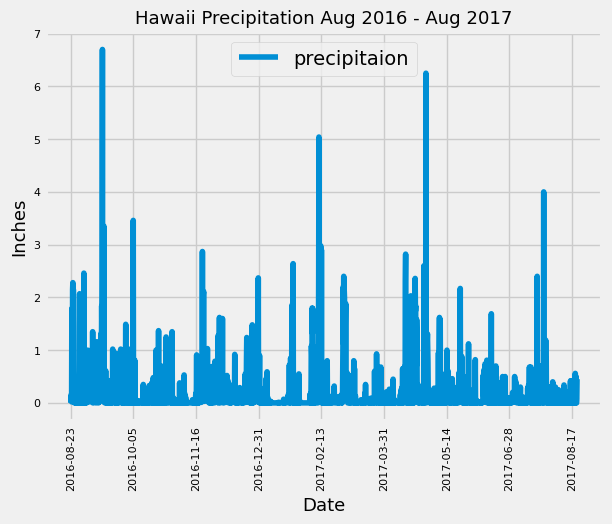

In [78]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
base_year = dt.date(2017, 8, 23)-dt.timedelta(days = 365)

# Calculate the date one year from the last date in data set.
prev_last_date = dt.date(base_year.year, base_year.month, base_year.day)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_last_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(scores, columns=['date', 'precipitaion'])
precipitation_df.head()

# Sort the dataframe by date
precipitation_df.set_index(precipitation_df['date'], inplace=True)
precipitation_df.head()

clean_prcp_df = precipitation_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data

clean_prcp_df.plot()

plt.xlabel("Date",  size = 13)
plt.ylabel("Inches", size = 13)
plt.title("Hawaii Precipitation Aug 2016 - Aug 2017", size = 13)
plt.xticks(rotation=90, size = 8)
plt.yticks(size = 8)
plt.show()

In [57]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_prcp_df.describe()

,precipitaion
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [68]:
# Finding columns and datatype for Station 
station_columns = inspector.get_columns('station')
for x in station_columns:
    print(x["name"], x["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [58]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [71]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_measurements = session.query(Measurement.station, func.count(Measurement.station)).\
                       group_by(Measurement.station).\
                       order_by(func.count(Measurement.station).desc()).all()
station_measurements

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [73]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
               filter(Measurement.station==station_measurements[0][0]).all()
temp_results

[(54.0, 85.0, 71.66378066378067)]

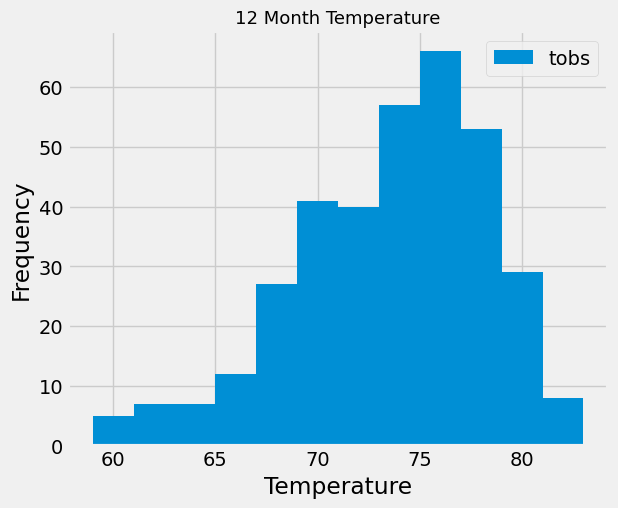

In [80]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_results = session.query(Measurement.tobs).filter(Measurement.station==station_measurements[0][0]).\
                  filter(Measurement.date>='2016-08-23').all()

station_temp = pd.DataFrame(station_results, columns = ['tobs'])
station_temp.plot.hist(bins = 12)
plt.tight_layout()
plt.title("12 Month Temperature", size  =13)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()
                  

# Close Session

In [81]:
# Close Session
session.close()